# Початок роботи з бібліотекою Numpy

У даній лабораторній роботі розглянуто наступний функціонал бібліотеки Numpy:
1. Створення масиву.
2. Відображення масивів .
3. Базові операції з масивами.

## Імпорт бібліотек та пакетів

Завантажуємо бібліотеку numpy та використаємо скорочення np.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Створеня масиву

Існує кілька способів створення масивів.
Наприклад, можливе створення масиву зі звичайного списку Python або за допомогою функції масиву. Тип отриманого масиву обирається відповідно до типу елементів у послідовностях.

In [0]:
a = np.array([2,3,4])
a

array([2, 3, 4])

#### Друк типу масиву

In [0]:
a.dtype

dtype('int64')

In [0]:
b = np.array([1.2, 3.5, 5.1])
b.dtype

dtype('float64')

#### Часта помилка полягає у виклику масиву з кількома числовими аргументами, а не в наданні єдиного списку чисел як аргументу.

In [0]:
a = np.array(1,2,3,4)    # ПОМИЛКА

ValueError: only 2 non-keyword arguments accepted

In [0]:
a = np.array([1,2,3,4])  # ВІРНО
a

array([1, 2, 3, 4])

Також можливе створення багатовимірних масивів

In [0]:
b = np.array([(1.5,2,3), (4,5,6)])
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

Тип масиву також може бути явно вказаний під час створення:

In [0]:
c = np.array( [ [1,2], [3,4] ], dtype=complex )
c

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Часто елементи масиву спочатку невідомі, але його розмір відомий. Отже, NumPy пропонує кілька функцій для створення масивів з початковим вмістом.

**np.zeros()** створює масив, заповнений нулями, **np.ones()** створюють масив, повний одиниць, а функція **np.empty()** створює масив, початковий вміст якого є випадковим і залежить від стану пам'яті. За замовчуванням типом створеного масиву є float64.

In [0]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [0]:
np.ones((2,3,4), dtype=np.int16) 

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [0]:
np.empty((2,3)) 

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

Коли використовується ранжування чисел із плаваючою точкою, як правило, неможливо передбачити кількість одержаних елементів через точність кінцевої плаваючої точки. З цієї причини, як правило, краще використовувати функцію **np.linspace**, яка отримує в якості аргументу кількість потрібних нам елементів, а не крок:

In [0]:
from numpy import pi
np.linspace(0, 2, 9)                 # 9 чисел від 0 до 2

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [0]:
x = np.linspace(0, 2*pi, 100)        
f = np.sin(x)

### Виведення масиву

In [0]:
a = np.arange(6)                         # 1-мірний масив
print(a)

[0 1 2 3 4 5]


In [0]:
b = np.arange(12).reshape(4,3)           # 2-мірний масив
print(b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [0]:
c = np.arange(24).reshape(2,3,4)         # 3-мірний масив
print(c)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


### Базові операції

Арифметичні оператори на масивах застосовуються по елементно. Створюється новий масив і заповнюється результатом.

In [0]:
a = np.array( [20,30,40,50] )
b = np.arange( 4 )
b

array([0, 1, 2, 3])

In [0]:
c = a-b
c

array([20, 29, 38, 47])

#### Зведення в ступінь

In [0]:
b**2

array([0, 1, 4, 9])

#### Множення

In [0]:
10*np.sin(a)

array([ 9.12945251, -9.88031624,  7.4511316 , -2.62374854])

#### Нерівність

In [0]:
a<35

array([ True,  True, False, False])

На відміну від багатьох матричних мов програмування, оператор множення $*$ працює по елементно в масивах NumPy. Матричне множення можна виконати за допомогою оператора **@** або методу **dot**:

In [0]:
A = np.array([[1,1],
              [0,1]] )

B = np.array([[2,0],
              [3,4]] )

По елементне множення

In [0]:
A * B                       

array([[2, 0],
       [0, 4]])

Матричне множення

In [0]:
A @ B                     

array([[5, 4],
       [3, 4]])

Матричне множення

In [0]:
A.dot(B)

array([[5, 4],
       [3, 4]])

Багато унарних операцій, таких як обчислення суми всіх елементів масиву, реалізовані як методи класу ndarray.

In [0]:
a = np.random.random((2,3))
a

array([[0.8807238 , 0.80954498, 0.4363596 ],
       [0.31225657, 0.15228422, 0.57718236]])

Сумування елементів масиву

In [0]:
a.sum()

3.168351538476806

Визначення мінімального значення

In [0]:
a.min()

0.15228422498698901

Визначення максимального значення

In [0]:
a.max()

0.8807238047576498

#### Робота із рядками та стовпцями

In [0]:
b = np.arange(12).reshape(3,4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Сумування кожного стовпця

In [0]:
b.sum(axis=0)                       

array([12, 15, 18, 21])

Мінімальні елементи в кожному стовпці

In [0]:
b.min(axis=0)                          

array([0, 1, 2, 3])

Максимальні елементи в кожному рядку

In [0]:
b.max(axis=1)  

array([ 3,  7, 11])

### Індексування масивів

In [0]:
a = np.arange(10)**3
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])

Доступ до довільного елементу масиву

In [0]:
a[2]

8

Доступ до декількох елементів масиву в зазначених межах

In [0]:
a[2:5]

array([ 8, 27, 64])

Ітеративна заміна значень масиву
Зі стартової позиції 6 замінити кожен другий елемент на -1000

In [0]:
a[:6:2] = -1000
a

array([-1000,     1, -1000,    27, -1000,   125,   216,   343,   512,
         729])

Реверс масиву

In [0]:
a[ : :-1]                               

array([  729,   512,   343,   216,   125, -1000,    27, -1000,     1,
       -1000])

Доступ до елментів масиву через цикл

In [0]:
for i in a:
    print("%1.0f" % (i**(1/3.)))

nan
1
nan
3
nan
5
6
7
8
9


/home/svs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


### Зміна розмірноста ("форми") масиву

За допомогою функції **np.floor**, яка округлює число до цілого створимо масив із віипадковими числами.

In [0]:
a = np.floor(10*np.random.random((3,4)))
a

array([[1., 9., 9., 0.],
       [4., 9., 2., 5.],
       [6., 4., 0., 8.]])

Визначення розмірності масиву

In [0]:
a.shape

(3, 4)

Форму масиву можна змінювати за допомогою різних команд. Зауважте, що всі наступні три команди повертають модифікований масив, але не змінюють початковий масив:

Функція **ravel()** перетворює багатовимірний масив в одновимірний

In [0]:
a.ravel()  

array([1., 9., 9., 0., 4., 9., 2., 5., 6., 4., 0., 8.])

Функція **reshape()** змінює форму масиву на задану

In [0]:
a.reshape(6,2)  

array([[1., 9.],
       [9., 0.],
       [4., 9.],
       [2., 5.],
       [6., 4.],
       [0., 8.]])

Транспонування масиву

In [0]:
a.T

array([[1., 4., 6.],
       [9., 9., 4.],
       [9., 2., 0.],
       [0., 5., 8.]])

Визначення розмірності транспонованого масиву

In [0]:
a.T.shape

(4, 3)

Визначення розмірності вихідного масиву

In [0]:
a.shape

(3, 4)

Функція **reshape()** повертає аргумент із зміненою формою, тоді як метод **resize()** змінює сам масив:

In [0]:
a

array([[1., 9., 9., 0.],
       [4., 9., 2., 5.],
       [6., 4., 0., 8.]])

In [0]:
a.resize((2,6))
a

array([[1., 9., 9., 0., 4., 9.],
       [2., 5., 6., 4., 0., 8.]])

# Завдання
## 1. Створити двомірний нульовий масив розміром 11х11 та заповнити його діагоналі одиницями.

1.1. Задати розмір масиву

In [0]:
size = 11

1.2. Створити нульовий масив заданого розміру

In [0]:
arr = np.zeros((size,size))

1.3 Надрукувати створений масив

In [5]:
print(arr)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


1.4 Змінити діагоналі за допомогою двох циклів

In [0]:
for i in range(size):
    for j in range(size):
        if (i==j):
            arr[i][-1-j] = 1
            arr[i][j]=1

1.5 Вивести створений масив

In [8]:
print(arr)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## 2. Засобами NumPy створити вертикальні та горизонтальні зображення градієнту в обидва боки (поступове збільшення яскравості на зображенні).

Приклад зображення градієнту
<img src="https://github.com/Vannnkof/DIP/blob/Images/assignments/horizontal_grad.jpg?raw=1" height="200" width="200">

### Горизонтальний градієнт

2.1 Створити нульовий масив розміром 255х255

In [0]:
horizontal_gradient1 = np.zeros((255,255))

2.2 Визначити розміри масиву

In [0]:
w = horizontal_gradient1.shape[1]
h = horizontal_gradient1.shape[0]

2.3 Поелементно змінити яскравості кожного пікселя

In [0]:
for i in range(0,h):
    for j in range(0,w):
        horizontal_gradient1[i][j] = j

2.4 Записати зображення засабами OpenCV

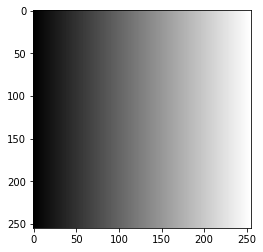

In [12]:
#cv2.imwrite('horizontal_grad1.jpg', horizontal_gradient1)#
plt.imshow(horizontal_gradient1,cmap='gray')

2.5 Аналогічно створити горизонтальний градієнт в інший бік

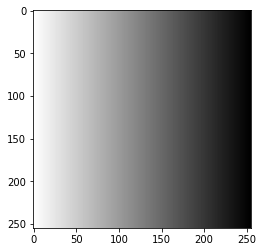

In [13]:
horizontal_gradient2 = np.zeros((255,255))

w = horizontal_gradient2.shape[1]
h = horizontal_gradient2.shape[0]
for i in range(0,h):
    for j in range(0,w):
        horizontal_gradient2[i][j] = 255-j 
        
#cv2.imwrite('horizontal_grad2.jpg', horizontal_gradient2)#
plt.imshow(horizontal_gradient2,cmap='gray')

### Вертикальний градієнт

2.6 Створити нульовий масив розміром 255х255

In [0]:
vertical_gradient1 = np.zeros((255,255))

2.7 Визначити розміри масиву

In [0]:
w = vertical_gradient1.shape[1]
h = vertical_gradient1.shape[0]

2.8 Поелементно змінити яскравості кожного пікселя

In [0]:
for i in range(0,w):
    for j in range(0,h):
        vertical_gradient1[j][i] = j

2.9 Записати зображення засабами OpenCV

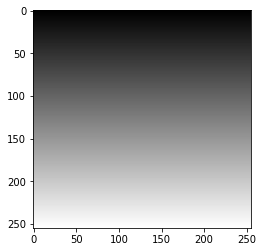

In [19]:
#cv2.imwrite('vertical_grad1.jpg', vertical_gradient1)#
plt.imshow(vertical_gradient1,cmap='gray')

2.10 Аналогічно створити горизонтальний градієнт в інший бік

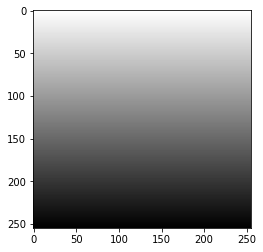

In [20]:
vertical_gradient2 = np.zeros((255,255))

w = vertical_gradient2.shape[1]
h = vertical_gradient2.shape[0]

for i in range(0,w):
    for j in range(0,h):
        vertical_gradient2[j][i] = 255-j
        
#cv2.imwrite('vertical_grad2.jpg', vertical_gradient2)#
plt.imshow(vertical_gradient2,cmap='gray')
